<br>
<h1 style = "font-size:35px; font-family:cursive ; font-weight : bold; color : #650076; text-align: center;">💲📈 Bitcoin Price Prediction : GreyKite V/s LSTM </h1>
<br>

![](https://thumbor.forbes.com/thumbor/960x0/https%3A%2F%2Fspecials-images.forbesimg.com%2Fdam%2Fimageserve%2F908633080%2F960x0.jpg%3Ffit%3Dscale)

# **Context**
<p style="font-size:15px;color:#1C37A6;">Bitcoin (₿) is a decentralized digital currency, without a central bank or single administrator, that can be sent from user to user on the peer-to-peer bitcoin network without the need for intermediaries. Transactions are verified by network nodes through cryptography and recorded in a public distributed ledger called a blockchain. The cryptocurrency was invented in 2008 by an unknown person or group of people using the name Satoshi Nakamoto. The currency began use in 2009 when its implementation was released as open-source software.<br><br>
Accurate knowledge about the future is helpful to any business. Time series forecasts can provide future expectations for metrics and other quantities that are measurable over time.<br> 
While domain knowledge and expert judgment can sometimes produce accurate forecasts, algorithmic automation enables scalability and reproducibility, and may improve accuracy. Algorithmic forecasts can be consumed by additional algorithms downstream to make decisions or derive insights.</p>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bitcoin-historical-data/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv


In [2]:
from IPython.display import HTML
HTML("""
<style>
h1,h2,h3 {
	margin: 1em 0 0.5em 0;
	font-weight: 600;
	font-family: 'Titillium Web', sans-serif;
	position: relative;  
	font-size: 36px;
	line-height: 40px;
	padding: 15px 15px 15px 2.5%;
	color: #13003A;
	box-shadow: 
		inset 0 0 0 1px rgba(53,86,129, 1), 
		inset 0 0 5px rgba(53,86,129, 1),
		inset -285px 0 35px white;
	border-radius: 0 10px 0 15px;
	background: #fff
    
}
</style>
""")

<h1 style="background-color:#88FBFF;font-size:30px;color:#00033E;font-weight : bold">Introduction to GreyKite :</h1>

![](https://content.linkedin.com/content/dam/engineering/site-assets/images/blog/posts/2021/05/greykite1.png)

<p style="font-size:15px;color:#1C37A6;">This brand new Python library <b>GreyKite by Linkedin</b>, is used for time series forecasting. This library makes the life of data scientists easier. 
    Its main forecasting algorithm, called <b>Silverkite</b>, is fast, accurate, and intuitive, making it suitable for interactive and automated forecasting at scale. We will start by describing a few applications and then walk through the algorithm design and user experience.</p>

<h1 style="background-color:#FF85A3;font-size:20px;color:#00033E;font-weight : bold">Tech behind GreyKite :</h1>

![](https://analyticsdrift.com/wp-content/uploads/2021/05/LinkedIn-greykite-architecture-1024x481.png)

<p style="font-size:15px;color:#1C37A6;"><b>Greykite</b> contains a simple modeling interface that facilitates data exploration and model tuning. The library provides intuitive forecasts through its flagship algorithm, known as Silverkite. <b>Silverkite</b> is highly customizable and includes tuning parameters to capture diverse time series characteristics. 
    Besides Silverkite, Greykite also supports <b>Prophet</b>, which is an open-source algorithm for forecasting time series data. The Prophet algorithm is developed by Facebook and is robust to missing data and shifts in the trend and handles outliers well.</p>

<h1 style="background-color:#FF85A3;font-size:20px;color:#00033E;font-weight : bold">Features of GreyKite :</h1>

- **Fast training and scoring**
Works with intelligent prototyping, framework search, and benchmarking. Matrix search is valuable for model choice and self-loader estimating of different measurements.
- **Flexible design**
Gives time arrangement regressors to catch pattern, irregularity, occasions, changepoints, and autoregression, and allows you to add your own.<br>
Fits the conjecture utilizing an AI model.
- **Intuitive Interface**
Gives incredible plotting apparatuses to investigate irregularity, connections, changepoints, and so forth <br>
Gives model formats (default boundaries) that function admirably dependent on information attributes and gauge prerequisites (for example every day long haul conjecture).<br>
Produces interpretable yield, with model rundown to analyze individual regressors, and segment plots to outwardly review the consolidated impact of related regressors <br>
- **Extensible Framework**
Uncovered numerous estimate calculations in a similar interface, making it simple to attempt calculations from various libraries and think about outcomes.<br>
A similar pipeline gives preprocessing, cross-approval, backtest, estimate, and assessment with any calculation.

<h1 style="background-color:#FF85A3;font-size:20px;color:#00033E;font-weight : bold">⚙ Installation :</h1>

In [3]:
!pip install greykite

     |████████████████████████████████| 21.8 MB 43 kB/s 
     |████████████████████████████████| 9.5 MB 11.6 MB/s 
     |████████████████████████████████| 764 kB 13.6 MB/s 
     |████████████████████████████████| 49 kB 3.8 MB/s 
     |████████████████████████████████| 208 kB 13.9 MB/s 
     |████████████████████████████████| 50.0 MB 19.8 MB/s 
     |████████████████████████████████| 73 kB 1.3 MB/s 
     |████████████████████████████████| 107 kB 31.4 MB/s 
     |████████████████████████████████| 2.2 MB 22.7 MB/s 
     |████████████████████████████████| 41.5 MB 18.7 MB/s 
     |████████████████████████████████| 211 kB 26.6 MB/s 
     |████████████████████████████████| 108 kB 29.0 MB/s 
     |████████████████████████████████| 89 kB 5.4 MB/s 
     |████████████████████████████████| 71 kB 6.3 MB/s 
     |████████████████████████████████| 2.9 MB 24.9 MB/s 
     |████████████████████████████████| 107 kB 32.1 MB/s 
     |████████████████████████████████| 6.4 MB 25.8 MB/s 
     |███████████████

In [4]:
!pip install pillow==4.1.1
%reload_ext autoreload
%autoreload

     |████████████████████████████████| 11.3 MB 5.4 MB/s 
  Created wheel for pillow: filename=Pillow-4.1.1-cp37-cp37m-linux_x86_64.whl size=1256700 sha256=d618e888fb7a06eca0ad6fb274f07c08eaa7429afb60ed569b68afe584d4d8e4
  Stored in directory: /root/.cache/pip/wheels/51/53/67/d76ff9fd54dd89a25efce20d2e7c9b35348db386b53deb8095
Successfully built pillow
  Attempting uninstall: pillow
    Found existing installation: Pillow 8.0.1
    Uninstalling Pillow-8.0.1:
      Successfully uninstalled Pillow-8.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-image 0.18.1 requires pillow!=7.1.0,!=7.1.1,>=4.3.0, but you have pillow 4.1.1 which is incompatible.
matplotlib 3.4.1 requires pillow>=6.2.0, but you have pillow 4.1.1 which is incompatible.
ipympl 0.7.0 requires ipywidgets>=7.6.0, but you have ipywidgets 7.2.1 which is incompatible.
greykite 0.1.1 requires Pi

In [5]:
!pip install --force-reinstall pandas

     |████████████████████████████████| 9.9 MB 4.9 MB/s 
     |████████████████████████████████| 510 kB 6.3 MB/s 
     |████████████████████████████████| 15.3 MB 11.5 MB/s 
     |████████████████████████████████| 227 kB 14.0 MB/s 
  Attempting uninstall: six
    Found existing installation: six 1.15.0
    Uninstalling six-1.15.0:
      Successfully uninstalled six-1.15.0
  Attempting uninstall: pytz
    Found existing installation: pytz 2021.1
    Uninstalling pytz-2021.1:
      Successfully uninstalled pytz-2021.1
  Attempting uninstall: python-dateutil
    Found existing installation: python-dateutil 2.8.1
    Uninstalling python-dateutil-2.8.1:
      Successfully uninstalled python-dateutil-2.8.1
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.2
    Uninstalling numpy-1.20.2:
      Successfully uninstalled numpy-1.20.2
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.3
    Uninstalling pandas-1.1.3:
      Successfully uninstalled p

<h1 style="background-color:#FF85A3;font-size:20px;color:#00033E;font-weight : bold">✅ Importing the required Libraries :</h1>

In [6]:
from collections import defaultdict
import warnings
import pandas as pd
warnings.filterwarnings("ignore")
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt 
import datetime, pytz
from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import gc
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import plotly
from sklearn.metrics import mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Activation
import keras
import tensorflow
from greykite.framework.templates.autogen.forecast_config import ForecastConfig
from greykite.framework.templates.autogen.forecast_config import MetadataParam
from greykite.framework.templates.forecaster import Forecaster 
from greykite.framework.templates.model_templates import ModelTemplateEnum
from greykite.framework.utils.result_summary import summarize_grid_search_results

<h1 style="background-color:#FF85A3;font-size:20px;color:#00033E;font-weight : bold"> 🛠 Data Preprocessing :</h1>

In [7]:
df = pd.read_csv('../input/bitcoin-historical-data/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')
df['date'] = pd.to_datetime(df['Timestamp'],unit='s').dt.date
group = df.groupby('date')
Price = group['Weighted_Price'].mean()

In [8]:
df_price_zz=Price.to_frame()
df_price_zz['Timestamp'] = df_price_zz.index
df_price_zz['Timestamp'] = pd.to_datetime(df_price_zz['Timestamp'])
df_price_zz.reset_index(drop=True,inplace=True)
df_price_include_zz = df_price_zz[df_price_zz['Timestamp'].dt.year >= 2017]
df_price_include_zz.reset_index(drop=True,inplace=True)
# df_price_include_zz

In [9]:
df_price_include_zz.set_index("Timestamp", inplace = True)
df_price_include_zz

,Weighted_Price
Timestamp,
2017-01-01,981.637688
2017-01-02,1013.199484
2017-01-03,1019.992995
2017-01-04,1079.434027
2017-01-05,1039.655397
...,...
2021-03-27,55193.357260
2021-03-28,55832.958824
2021-03-29,56913.993819


In [10]:
Price.to_numpy()
df_price=Price.to_frame()
df_price['Timestamp'] = df_price.index
df_price['Timestamp'] = pd.to_datetime(df_price['Timestamp'])
df_price.reset_index(drop=True,inplace=True)
df_price_include = df_price[df_price['Timestamp'].dt.year >= 2017]
df_price_include.reset_index(drop=True,inplace=True)

In [11]:
prediction_days = 50
df_train= df_price_include_zz[:len(df_price_include_zz)-prediction_days]
df_test= df_price_include_zz[len(df_price_include_zz)-prediction_days:]

<h1 style="background-color:#FF85A3;font-size:20px;color:#00033E;font-weight : bold"> Creating a Forecast :</h1>

<p style="font-size:15px;color:#1C37A6;">The forecast can be created with just a few lines of code. First, specify the dataset information. We are setting the time_col parameter as 'Timestamp' and the value_col parameter as 'Weighted_Price'. In freq, we are setting value as D for Daily at the start date. After this create a forecaster using the Forecaster class from the GreyKite package. The output of run_forecast_config() would be a dictionary which is having future predicted values, original time series, and historical forecast performance</p>

In [12]:
metadata = MetadataParam(
 time_col="Timestamp",   # ----> name of the time column 
 value_col="Weighted_Price",  # ----> name of the value column 
 freq="W"           #"MS" for Montly at start date, "H" for hourly, "D" for daily, "W" for weekly, etc.
)

In [13]:
forecaster = Forecaster()
result = forecaster.run_forecast_config(
     df=df_price_include,
     config=ForecastConfig(
         model_template=ModelTemplateEnum.SILVERKITE.name,
         forecast_horizon=30,  # forecasts 30 steps ahead
         coverage=0.95,  # 95% prediction intervals
         metadata_param=metadata
    )
)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


In [14]:
fig = result.timeseries.plot()
fig.show()

<h1 style="background-color:#FF85A3;font-size:20px;color:#00033E;font-weight : bold">Cross-Validation :</h1>

<p style="font-size:15px;color:#1C37A6;">As a matter of course, run_forecast_config gives chronicled assessment, so you can perceive how the conjecture performs on past information. This is put away in grid_search (cross-approval parts) and backtest (holdout test set).</p>

In [15]:
grid_search = result.grid_search
cv_results = summarize_grid_search_results(
     grid_search=grid_search,
     decimals=2,
     # The below saves space in the printed output. Remove to show all available metrics and columns.
     cv_report_metrics=None,
     column_order=["rank", "mean_test", "split_test", "mean_train", "split_train", "mean_fit_time", "mean_score_time", "params"])
 # Transposes to save space in the printed output
cv_results["params"] = cv_results["params"].astype(str)
cv_results.set_index("params", drop=True, inplace=True)
cv_results.transpose()

params,[]
rank_test_MAPE,1
mean_test_MAPE,61.08
split_test_MAPE,"(119.69, 34.5, 29.04)"
mean_train_MAPE,74.34
split_train_MAPE,"(25.57, 101.05, 96.4)"
mean_fit_time,10.36
mean_score_time,0.88


<h1 style="background-color:#FF85A3;font-size:20px;color:#00033E;font-weight : bold">Backtest :</h1>

In [16]:
backtest = result.backtest
fig = backtest.plot().show()

In [17]:
backtest_eval = defaultdict(list)
for metric, value in backtest.train_evaluation.items():
    backtest_eval[metric].append(value)
    backtest_eval[metric].append(backtest.test_evaluation[metric])
metrics = pd.DataFrame(backtest_eval, index=["train", "test"]).T
metrics

,train,test
CORR,0.594936,-0.214846
R2,0.290326,-1.358032
MSE,8220000.077316,651840627.084136
RMSE,2867.054251,25531.169716
MAE,2218.427776,19311.124468
MedAE,1993.22315,11812.747633
MAPE,66.119362,54.895566
MedAPE,25.144316,55.25163
sMAPE,19.925027,41.851798
Q80,1109.213888,15448.899574


<h1 style="background-color:#FF85A3;font-size:20px;color:#00033E;font-weight : bold">Forecast :</h1>

In [18]:
forecast = result.forecast
fig = forecast.plot().show()


In [19]:
forecast.df.head().round(2)

,Timestamp,actual,forecast,forecast_lower,forecast_upper
0,2017-01-01,981.64,5161.43,-11440.63,21763.49
1,2017-01-08,915.21,5579.10,-11022.96,22181.16
2,2017-01-15,817.05,5654.55,-10947.51,22256.61
3,2017-01-22,921.00,5324.90,-11277.16,21926.96
4,2017-01-29,916.47,5241.50,-11360.56,21843.56


<h1 style="background-color:#FF85A3;font-size:20px;color:#00033E;font-weight : bold">Model Diagnostics :</h1>

 <p style="font-size:15px;color:#1C37A6;"> This plot shows how your dataset’s trend, event/holiday, seasonality patterns are handled in the model.</p>

In [20]:
fig = forecast.plot_components().show()


 <p style="font-size:15px;color:#1C37A6;"> The model summary allows inspection of individual model terms. Check parameter estimates and their significance for insights on how the model works and what can be further improved.</p>


In [21]:
summary = result.model[-1].summary()  # -1 retrieves the estimator from the pipeline
print(summary)

================================ Model Summary =================================

Number of observations: 222,   Number of features: 101
Method: Ridge regression
Number of nonzero features: 72
Regularization parameter: 376.5

Residuals:
         Min           1Q       Median           3Q          Max
     -8495.0      -3627.0      -2059.0       -21.37    4.445e+04

            Pred_col Estimate Std. Err Pr(>)_boot sig. code             95%CI
           Intercept   4769.0    368.1     <2e-16       ***  (4166.0, 5631.0)
 events_C...New Year       0.       0.      1.000                    (0., 0.)
 events_C...w Year-1       0.       0.      1.000                    (0., 0.)
 events_C...w Year-2   -17.32     16.2      0.130                (-53.89, 0.)
 events_C...w Year+1   -21.04    14.51      0.096         .      (-54.25, 0.)
 events_C...w Year+2     92.1     78.1      0.094         .       (0., 259.2)
events_Christmas Day       0.       0.      1.000                    (0., 0.)
 events_

In [22]:
model = result.model
model

Pipeline(steps=[('input',
                 PandasFeatureUnion(transformer_list=[('date',
                                                       Pipeline(steps=[('select_date',
                                                                        ColumnSelector(column_names=['ts']))])),
                                                      ('response',
                                                       Pipeline(steps=[('select_val',
                                                                        ColumnSelector(column_names=['y'])),
                                                                       ('outlier',
                                                                        ZscoreOutlierTransformer()),
                                                                       ('null',
                                                                        NullTransformer(impute_algorithm='interpolate',
                                                                 

In [23]:
future_df = result.timeseries.make_future_dataframe(
    periods=4,
    include_history=False)
future_df

,ts,y
2021-04-04,2021-04-04,NaN
2021-04-11,2021-04-11,NaN
2021-04-18,2021-04-18,NaN
2021-04-25,2021-04-25,NaN


In [24]:
model.predict(future_df)

,ts,forecast,forecast_lower,forecast_upper,y_quantile_summary
0,2021-04-04,13649.960702,-2952.099380,30252.020784,"(-2952.099380335603, 30252.020784326283)"
1,2021-04-11,13489.418170,-3112.641912,30091.478253,"(-3112.6419118407503, 30091.478252821136)"
2,2021-04-18,13722.150936,-2879.909146,30324.211018,"(-2879.9091462868455, 30324.21101837504)"
3,2021-04-25,13904.266001,-2697.794081,30506.326083,"(-2697.794081232947, 30506.32608342894)"


<h1 style="background-color:#88FBFF;font-size:30px;color:#00033E;font-weight : bold">LSTM approach :</h1>

![](https://miro.medium.com/max/1032/1*AUwc53cmW04hjPrKtVyePQ.gif)

In [25]:
training_set = df_train.values
training_set = np.reshape(training_set, (len(training_set), 1))
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)
X_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]
X_train = np.reshape(X_train, (len(X_train), 1, 1))

<h1 style="background-color:#FF85A3;font-size:20px;color:#00033E;font-weight : bold">Training the Model :</h1>

In [26]:
model1 = Sequential()
model1.add(LSTM(10,activation="sigmoid",return_sequences = True,input_shape = (None, 1)))
# model1.add(Dropout(0.2))
# model1.add(LSTM(64,return_sequences = True))
# model1.add(Dropout(0.2))
# model1.add(LSTM(10))
# model1.add(Dropout(0.2))

model1.add(Dense(1))
model1.compile(loss='mean_squared_error', optimizer='adam')

In [27]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, None, 10)          480       
_________________________________________________________________
dense (Dense)                (None, None, 1)           11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [28]:
history=model1.fit(X_train, y_train, batch_size = 5, epochs = 20)

Epoch 1/20
300/300 [==============================] - 2s 1ms/step - loss: 0.0172
Epoch 2/20
300/300 [==============================] - 0s 1ms/step - loss: 0.0152
Epoch 3/20
300/300 [==============================] - 0s 1ms/step - loss: 0.0116
Epoch 4/20
300/300 [==============================] - 0s 1ms/step - loss: 0.0100
Epoch 5/20
300/300 [==============================] - 0s 1ms/step - loss: 0.0091
Epoch 6/20
300/300 [==============================] - 0s 1ms/step - loss: 0.0064
Epoch 7/20
300/300 [==============================] - 0s 1ms/step - loss: 0.0048
Epoch 8/20
300/300 [==============================] - 0s 1ms/step - loss: 0.0021
Epoch 9/20
300/300 [==============================] - 0s 1ms/step - loss: 9.8513e-04
Epoch 10/20
300/300 [==============================] - 0s 1ms/step - loss: 4.2500e-04
Epoch 11/20
300/300 [==============================] - 0s 1ms/step - loss: 1.9875e-04
Epoch 12/20
300/300 [==============================] - 0s 2ms/step - loss: 1.3462e-04
Epoch 13/

<h1 style="background-color:#FF85A3;font-size:20px;color:#00033E;font-weight : bold">Visualizing Model Performance :</h1>

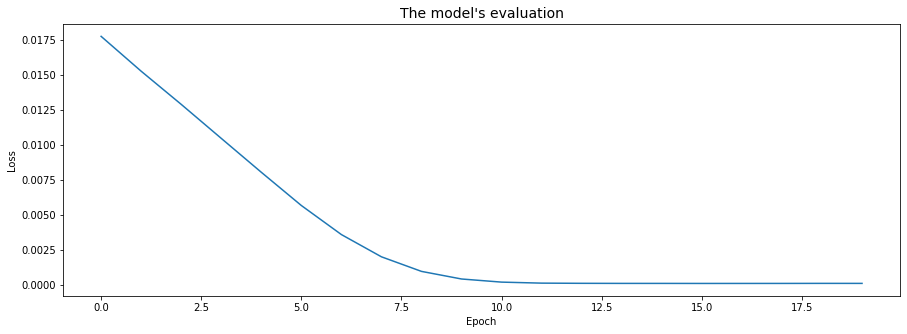

In [29]:
%matplotlib inline
plt.figure(figsize=(15,5))
plt.plot(history.history['loss'])
plt.title("The model's evaluation", fontsize=14)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

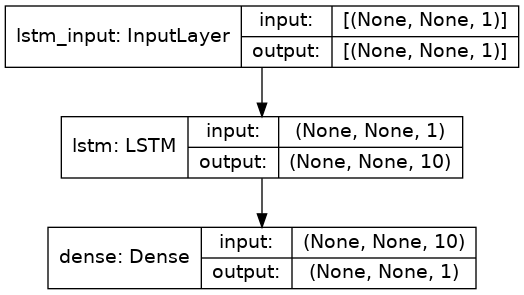

In [30]:
from keras.utils.vis_utils import plot_model
plot_model(model1, to_file='model_plot.png', show_shapes=True, show_layer_names=True, expand_nested=False)

In [31]:
# Making the predictions
test_set = df_test.values
inputs = np.reshape(test_set, (len(test_set), 1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))
predicted_BTC_price = model1.predict(inputs)
predicted_BTC_price=predicted_BTC_price.reshape(-1,1)
predicted_BTC_price = sc.inverse_transform(predicted_BTC_price)

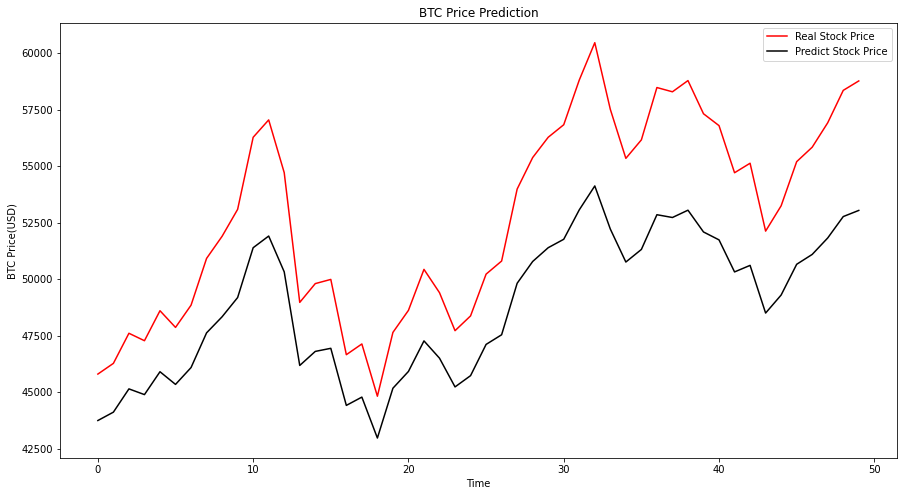

In [32]:
%matplotlib inline
plt.figure(figsize=(15,8))
plt.plot(test_set, color = "red", label = "Real Stock Price")
plt.plot(predicted_BTC_price, color = "black", label = "Predict Stock Price")
plt.title("BTC Price Prediction")
plt.xlabel("Time")
plt.ylabel("BTC Price(USD)")
plt.legend()
plt.show()

<h1 style="background-color:#88FBFF;font-size:20px;color:#00033E;font-weight : bold">Wrapping Up :</h1>

 <p style="font-size:15px;color:#1C37A6;font-weight : bold">I had tried to give a gentle introduction to Time Series Forecasting Using GreyKite Python Library and the traditional LSTM approach. I hope you learn something from this blog, and it will help you in the future.<br>
The library is still in the development process, and the developers are planning to add other useful open-source algorithms in the future to give users more options to choose from through a unified interface.</p>

**References** :
- https://engineering.linkedin.com/blog/2021/greykite--a-flexible--intuitive--and-fast-forecasting-library
- https://arxiv.org/abs/2105.01098
- https://venturebeat.com/2021/05/13/linkedin-open-sources-greykite-a-library-for-time-series-forecasting/
- https://github.com/linkedin/greykite
- https://analyticsindiamag.com/linkedin-open-sources-this-new-library-for-time-series-forecasting/



![](https://i.pinimg.com/originals/cf/90/bb/cf90bb1b741ff44adde054a2e12b82e6.gif)

# **Do UPVOTE if you like my work** 